In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

dataset_path = "/content/drive/MyDrive/week-4_(AI)/FruitinAmazon.zip"
extract_path = "/content/FruitinAmazon"
# Extract the zip file
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify
os.listdir(extract_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['FruitinAmazon']

In [ ]:
import zipfile
import os

dataset_path = "/content/drive/MyDrive/week-4_(AI)/FruitinAmazon.zip"
extract_path = "/content/"
# Extract the zip file
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extraction
os.listdir(extract_path)

['.config', 'drive', 'FruitinAmazon', 'sample_data']

In [ ]:
for root, dirs, files in os.walk("/content/FruitinAmazon"):
    print(root)

/content/FruitinAmazon
/content/FruitinAmazon/test
/content/FruitinAmazon/test/graviola
/content/FruitinAmazon/test/tucuma
/content/FruitinAmazon/test/pupunha
/content/FruitinAmazon/test/guarana
/content/FruitinAmazon/test/cupuacu
/content/FruitinAmazon/test/acai
/content/FruitinAmazon/train
/content/FruitinAmazon/train/graviola
/content/FruitinAmazon/train/tucuma
/content/FruitinAmazon/train/pupunha
/content/FruitinAmazon/train/guarana
/content/FruitinAmazon/train/cupuacu
/content/FruitinAmazon/train/acai
/content/FruitinAmazon/FruitinAmazon
/content/FruitinAmazon/FruitinAmazon/test
/content/FruitinAmazon/FruitinAmazon/test/graviola
/content/FruitinAmazon/FruitinAmazon/test/tucuma
/content/FruitinAmazon/FruitinAmazon/test/pupunha
/content/FruitinAmazon/FruitinAmazon/test/guarana
/content/FruitinAmazon/FruitinAmazon/test/cupuacu
/content/FruitinAmazon/FruitinAmazon/test/acai
/content/FruitinAmazon/FruitinAmazon/train
/content/FruitinAmazon/FruitinAmazon/train/graviola
/content/FruitinA

In [ ]:
train_dir = "/content/FruitinAmazon/train"


In [ ]:
from PIL import Image, UnidentifiedImageError
import os

corrupted_images = []  # List to store corrupted image paths

# Define your class names based on folder names in the training directory
class_names = os.listdir(train_dir)  # or manually: ['acai', 'cupuacu', ...]

# Loop through each class folder and check for corrupted images
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it’s a valid directory
        images = os.listdir(class_path)
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print("\nCorrupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("\nNo corrupted images found.")



No corrupted images found.


In [ ]:
# Dictionary to store class counts
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)  # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
graviola                              15
tucuma                                15
pupunha                               15
guarana                               15
cupuacu                               15
acai                                  15


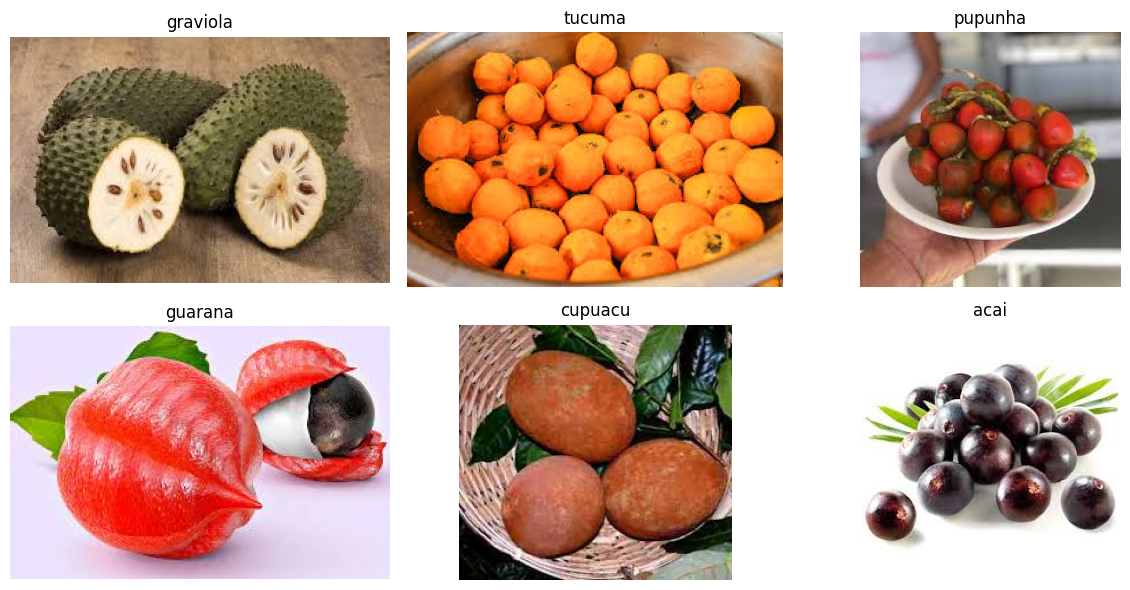

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

selected_images = []  # Store image paths
selected_labels = []  # Store corresponding class names

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if images:  # Ensure the class folder is not empty
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Determine columns
rows = 2  # Fixed rows for layout

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
axes = axes.flatten()  # Flatten in case of 2D array

for i in range(rows * cols):
    ax = axes[i]
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")  # Hide unused subplots

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/FruitinAmazon/train'
valid_dir = '/content/FruitinAmazon/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [ ]:
from tensorflow.keras import layers, models
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,139,014 (80.64 MB)

 Trainable params: 6,424,326 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=250,
    validation_data=valid_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 11s/step - accuracy: 0.2088 - loss: 4.0391 - val_accuracy: 0.3333 - val_loss: 3.4452
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 478ms/step - accuracy: 0.3363 - loss: 3.5157 - val_accuracy: 0.3000 - val_loss: 2.2130
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 773ms/step - accuracy: 0.4270 - loss: 1.8447 - val_accuracy: 0.5667 - val_loss: 1.4259
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 571ms/step - accuracy: 0.6187 - loss: 1.0562 - val_accuracy: 0.3667 - val_loss: 1.5643
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step - accuracy: 0.7049 - loss: 0.8619 - val_accuracy: 0.4000 - val_loss: 1.4388
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step - accuracy: 0.7177 - loss: 0.8417 - val_accuracy: 0.5667 - val_loss: 1.3376
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 507ms/step - accuracy: 0.8023 - loss: 0.6283 - val_accuracy: 0.4667 - val_loss: 1.5367
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 493ms/step - accuracy: 0.7810 - loss: 0.5740 - val_accuracy: 0.5000 - va

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
train_dir = '/content/FruitinAmazon/FruitinAmazon/train'
valid_dir = '/content/FruitinAmazon/FruitinAmazon/test'


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=15)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    epochs=250,  # Can increase for better accuracy
    validation_data=valid_generator
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 515ms/step - accuracy: 0.7016 - loss: 1.1322 - val_accuracy: 0.4667 - val_loss: 1.3421
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 519ms/step - accuracy: 0.7352 - loss: 1.0514 - val_accuracy: 0.6000 - val_loss: 1.3201
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 900ms/step - accuracy: 0.7880 - loss: 1.0421 - val_accuracy: 0.5667 - val_loss: 1.2953
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 715ms/step - accuracy: 0.7660 - loss: 0.9791 - val_accuracy: 0.6000 - val_loss: 1.2752
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 498ms/step - accuracy: 0.7704 - loss: 0.9313 - val_accuracy: 0.5667 - val_loss: 1.2570
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 588ms/step - accuracy: 0.7779 - loss: 0.9320 - val_accuracy: 0.6000 - val_loss: 1.2479
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 514ms/step - accuracy: 0.7971 - loss: 0.8944 - val_accuracy: 0.6000 - val_loss: 1.2390
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 493ms/step - accuracy: 0.8211 - loss: 0.8396 - val_accuracy: 0.6000 - v

In [ ]:
# Predict on validation data
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = valid_generator.classes
class_labels = list(valid_generator.class_indices.keys())

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
              precision    recall  f1-score   support

        acai       0.67      0.80      0.73         5
     cupuacu       0.40      0.40      0.40         5
    graviola       0.75      0.60      0.67         5
     guarana       1.00      1.00      1.00         5
     pupunha       1.00      0.40      0.57         5
      tucuma       0.38      0.60      0.46         5

    accuracy                           0.63        30
   macro avg       0.70      0.63      0.64        30
weighted avg       0.70      0.63      0.64        30



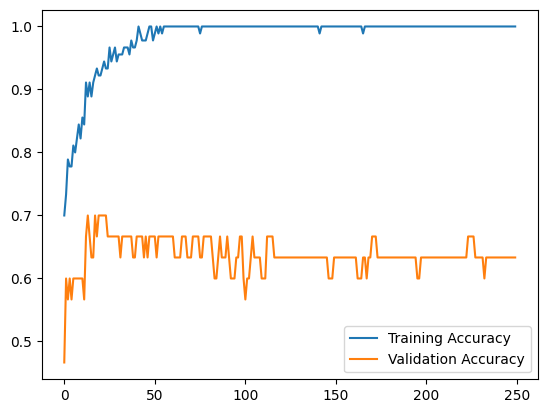

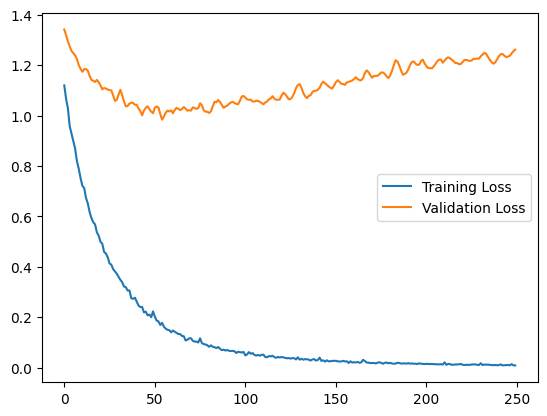

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()
